In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
tf.random.set_seed(123)

In [ ]:
# Data Exploration

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
# https://www.kaggle.com/erenaktas/human-activity-recognition
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

--2025-11-15 19:53:20--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M  43.2MB/s    in 1.3s    

2025-11-15 19:53:22 (43.2 MB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]



In [3]:
!unzip -nq UCI-HAR.zip

In [4]:
!ls

 __MACOSX   sample_data  'UCI HAR Dataset'   UCI-HAR.zip


In [5]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [6]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [7]:
!head 'UCI HAR Dataset/train/subject_train.txt'

1
1
1
1
1
1
1
1
1
1


In [8]:
def printUnique(file_path):
    uniqueSet = set()
    try:
        # Open the file in read mode ('r')
        with open(file_path, 'r') as file:
            # Iterate over each line in the file object
            for line_number, line in enumerate(file, 1):
                uniqueSet.add(int(line))
                # Process each line (e.g., print it, strip whitespace, etc.)
                # print(f"Line {line_number}: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    print(uniqueSet)

In [9]:
printUnique('UCI HAR Dataset/train/subject_train.txt')

{1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30}


In [11]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [22]:
def countValidTokensinLine(dir_name,trainOrTest):
  file_path = dir_name + trainOrTest + '.txt'
  uniqueSet = set()
  try:
    # Open the file in read mode ('r')
    with open(file_path, 'r') as file:
      # Iterate over each line in the file object
      for line_number, line in enumerate(file, 1):
        lineList = line.split(' ')
        uniqueSet.add(len(lineList)-lineList.count(''))
        # Process each line (e.g., print it, strip whitespace, etc.)
        # print(f"Line {line_number}: {line.strip()}")
  except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
  except Exception as e:
    print(f"An error occurred: {e}")
  print(uniqueSet)

In [23]:
countValidTokensinLine('UCI HAR Dataset/train/X_','train')

{561}


In [24]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [25]:
printUnique('UCI HAR Dataset/train/y_train.txt')

{1, 2, 3, 4, 5, 6}


In [26]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [20]:
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_acc_x_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_acc_y_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_acc_z_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_gyro_y_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_gyro_z_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/total_acc_x_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/total_acc_y_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/total_acc_z_','train')



{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}


In [30]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [29]:
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_acc_x_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_acc_y_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_acc_z_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_gyro_x_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_gyro_y_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_gyro_z_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/total_acc_x_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/total_acc_y_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/total_acc_z_','test')

{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}


In [31]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [32]:
df = pd.read_csv(
    'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
    header=None,
    delim_whitespace=True,
)

/tmp/ipython-input-1398892278.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


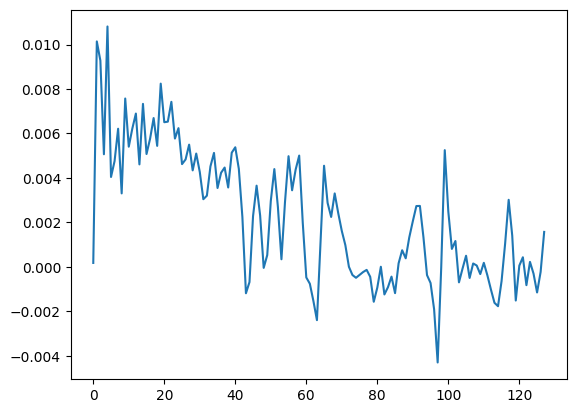

In [35]:
df.iloc[0].plot();

In [36]:
# Obtain these by inspecting the files
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # since there are 9 files
K = 6 # number of classes (1-6)

In [37]:
def load_data():
  # Returns:
  # Xtrain (Ntrain x T x D), Ytrain (Ntrain)
  # Xtest (Ntest x T x D), Ytest (Ntest)

  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  # train data
  ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x

  # train labels
  Ytrain = pd.read_csv(
      f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  # test data
  ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x

  # test labels
  Ytest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

In [38]:
Xtrain, Ytrain, Xtest, Ytest = load_data()

/tmp/ipython-input-2345648701.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-2345648701.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-2345648701.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-2345648701.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-2345648701.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/

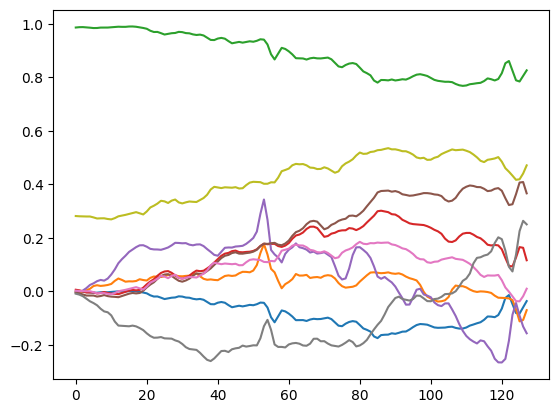

In [39]:
# plot all D=9 time series of length T=128
plt.plot(Xtrain[7000, :, :]);

In [40]:
# ANN
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs, x)

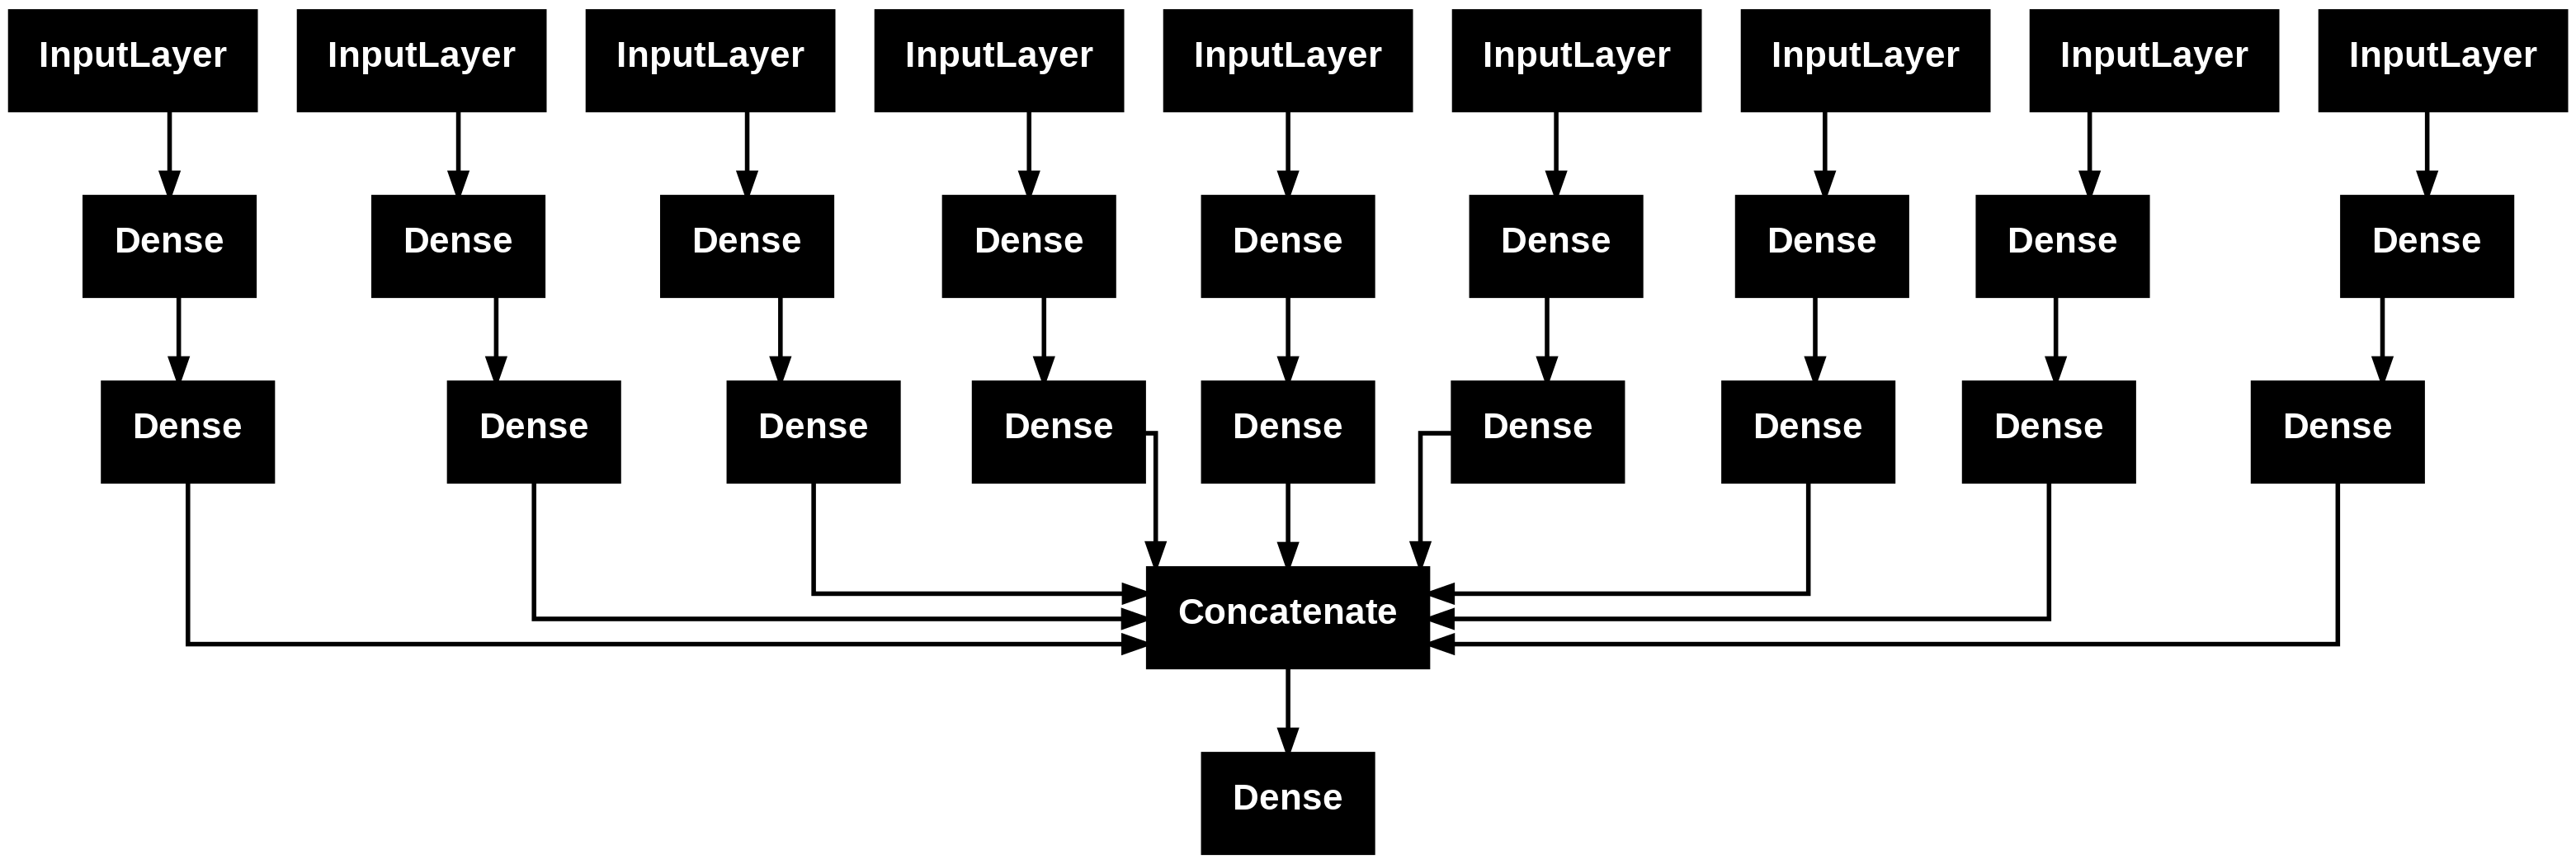

In [41]:
tf.keras.utils.plot_model(model)

In [42]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True)

In [43]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [44]:
Xtrain_split = []
Xtest_split = []
for d in range(D):
  Xtrain_split.append(Xtrain[:, :, d])
  Xtest_split.append(Xtest[:, :, d])

In [45]:
r = model.fit(
  Xtrain_split,
  Ytrain,
  epochs=15,
  callbacks=[check_point],
  validation_data=(Xtest_split, Ytest),
)

Epoch 1/15
220/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5768 - loss: 1.1311

230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5858 - loss: 1.1100 - val_accuracy: 0.8354 - val_loss: 0.4786
Epoch 2/15
228/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9208 - loss: 0.2419

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9208 - loss: 0.2417 - val_accuracy: 0.8548 - val_loss: 0.3750
Epoch 3/15
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9421 - loss: 0.1723

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9420 - loss: 0.1722 - val_accuracy: 0.8717 - val_loss: 0.3271
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9503 - loss: 0.1389

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9503 - loss: 0.1389 - val_accuracy: 0.8826 - val_loss: 0.3006
Epoch 5/15
218/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9582 - loss: 0.1192

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9580 - loss: 0.1194 - val_accuracy: 0.8887 - val_loss: 0.2802
Epoch 6/15
221/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9605 - loss: 0.1070

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9605 - loss: 0.1071 - val_accuracy: 0.8955 - val_loss: 0.2696
Epoch 7/15
227/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9635 - loss: 0.0990

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9635 - loss: 0.0990 - val_accuracy: 0.9013 - val_loss: 0.2634
Epoch 8/15
221/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.0919

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9653 - loss: 0.0921 - val_accuracy: 0.9036 - val_loss: 0.2562
Epoch 9/15
229/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9678 - loss: 0.0863

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9678 - loss: 0.0864 - val_accuracy: 0.9040 - val_loss: 0.2508
Epoch 10/15
216/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9697 - loss: 0.0817

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9696 - loss: 0.0819 - val_accuracy: 0.9067 - val_loss: 0.2448
Epoch 11/15
228/230 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9712 - loss: 0.0780

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9712 - loss: 0.0780 - val_accuracy: 0.9080 - val_loss: 0.2435
Epoch 12/15
228/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9730 - loss: 0.0743

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9730 - loss: 0.0743 - val_accuracy: 0.9091 - val_loss: 0.2397
Epoch 13/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.0709

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9737 - loss: 0.0709 - val_accuracy: 0.9101 - val_loss: 0.2426
Epoch 14/15
225/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.0676

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9747 - loss: 0.0677 - val_accuracy: 0.9114 - val_loss: 0.2405
Epoch 15/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9753 - loss: 0.0641 - val_accuracy: 0.9070 - val_loss: 0.2517


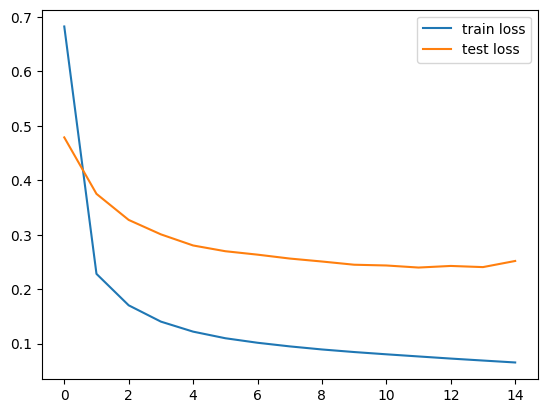

In [46]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

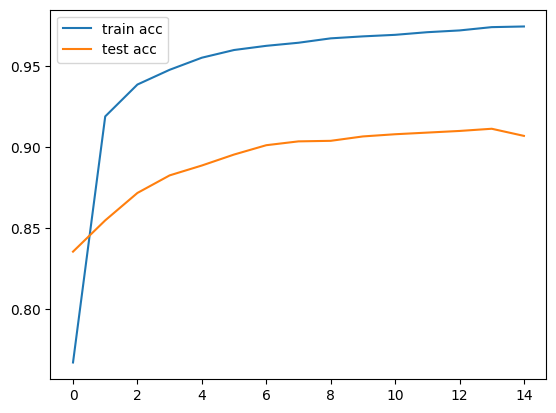

In [47]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [48]:
# load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [49]:
# make predictions
Ptest = best_model.predict(Xtest_split)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [50]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

np.float64(0.9114353579911775)

In [51]:
from sklearn.preprocessing import StandardScaler

def load_features():
  # Returns:
  # X_train (Ntrain x D)
  # X_test (Ntest x D)

  # train data
  df = pd.read_csv(
        'UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True)

  feat_train = df.to_numpy()

  # test data
  df = pd.read_csv(
        'UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True)

  feat_test = df.to_numpy()

  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

In [52]:
feat_train, feat_test = load_features()

/tmp/ipython-input-3389213826.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-3389213826.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [53]:
D_feat = feat_train.shape[1]

In [54]:
# Basic ANN
i = Input(shape=(D_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
model = Model(i, x)

In [55]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [56]:
check_point2 = ModelCheckpoint(
    'best_model_basic.h5', monitor='val_accuracy', save_best_only=True)

In [57]:
r = model.fit(
  feat_train,
  Ytrain,
  epochs=15,
  callbacks=[check_point2],
  validation_data=(feat_test, Ytest),
)

Epoch 1/15
225/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.6208

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7681 - loss: 0.6132 - val_accuracy: 0.9206 - val_loss: 0.2174
Epoch 2/15
219/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1181

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1175 - val_accuracy: 0.9270 - val_loss: 0.1869
Epoch 3/15
223/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9755 - loss: 0.0757

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0757 - val_accuracy: 0.9277 - val_loss: 0.1815
Epoch 4/15
209/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.0589

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0589 - val_accuracy: 0.9281 - val_loss: 0.1855
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0498 - val_accuracy: 0.9264 - val_loss: 0.1977
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9847 - loss: 0.0427 - val_accuracy: 0.9257 - val_loss: 0.2099
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9247 - val_loss: 0.2191
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0332 - val_accuracy: 0.9230 - val_loss: 0.2379
Epoch 9/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9213 - val_loss: 0.2475
Epoch 10/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0268 - val_accuracy: 0.9179 - val_loss: 0.2678
Epoch 11/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9934 - loss: 0.0245 - val_accuracy: 0.9162 - va

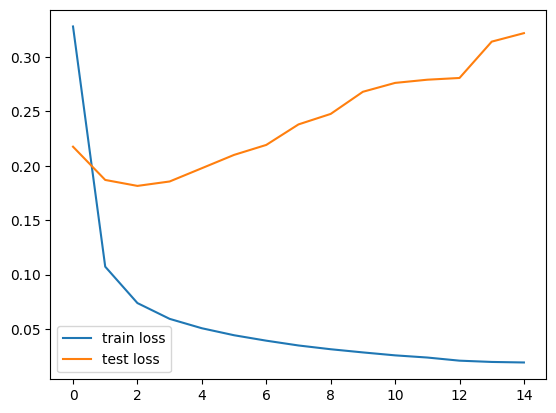

In [58]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

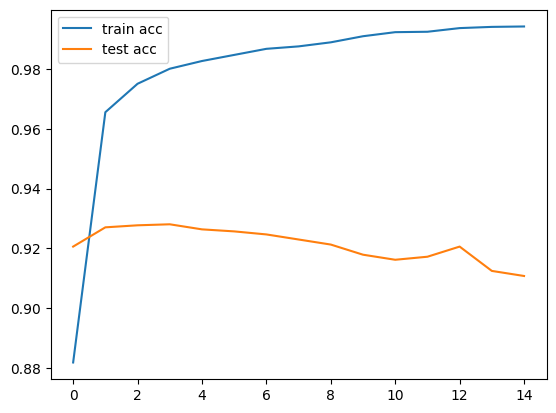

In [59]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [60]:
# load best model
best_model = tf.keras.models.load_model('best_model_basic.h5')

In [61]:
# make predictions
Ptest = best_model.predict(feat_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [62]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

np.float64(0.9280624363759755)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [64]:
model = LogisticRegression(
    solver='liblinear',
)
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9945593035908596

In [65]:
model.score(feat_test, Ytest)

0.9613165931455717

In [66]:
model = SVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9866702937976061

In [67]:
model.score(feat_test, Ytest)

0.9521547336274178

In [68]:
# model = SVC(kernel='linear')
model = LinearSVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9975516866158868

In [69]:
model.score(feat_test, Ytest)

0.9626739056667798

In [70]:
model = RandomForestClassifier()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

1.0

In [71]:
model.score(feat_test, Ytest)

0.9321343739395996

In [72]:
# Combined Model
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

In [73]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [74]:
check_point3 = ModelCheckpoint(
    'best_model_combined.h5', monitor='val_accuracy', save_best_only=True)

In [75]:
r = model.fit(
  Xtrain_split + [feat_train],
  Ytrain,
  epochs=15,
  callbacks=[check_point3],
  validation_data=(Xtest_split + [feat_test], Ytest),
)

Epoch 1/15
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7909 - loss: 0.5773

230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7931 - loss: 0.5713 - val_accuracy: 0.9257 - val_loss: 0.1942
Epoch 2/15
218/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9678 - loss: 0.0916

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9678 - loss: 0.0914 - val_accuracy: 0.9389 - val_loss: 0.1677
Epoch 3/15
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9773 - loss: 0.0626

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9773 - loss: 0.0627 - val_accuracy: 0.9450 - val_loss: 0.1616
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9786 - loss: 0.0502 - val_accuracy: 0.9423 - val_loss: 0.1737
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9823 - loss: 0.0428 - val_accuracy: 0.9413 - val_loss: 0.1841
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9867 - loss: 0.0376 - val_accuracy: 0.9399 - val_loss: 0.1897
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9882 - loss: 0.0330 - val_accuracy: 0.9399 - val_loss: 0.1981
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9905 - loss: 0.0287 - val_accuracy: 0.9396 - val_loss: 0.1999
Epoch 9/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.9437 - val_loss: 0.2005
Epoch 10/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9921 - loss: 0.0235 - val_accuracy: 0.9427 - va

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9923 - loss: 0.0221 - val_accuracy: 0.9505 - val_loss: 0.1902
Epoch 12/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9926 - loss: 0.0194 - val_accuracy: 0.9467 - val_loss: 0.2097
Epoch 13/15
228/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0192

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9916 - loss: 0.0191 - val_accuracy: 0.9552 - val_loss: 0.1758
Epoch 14/15
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.0184

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9928 - loss: 0.0184 - val_accuracy: 0.9576 - val_loss: 0.1650
Epoch 15/15
225/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9946 - loss: 0.0167

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9583 - val_loss: 0.1577


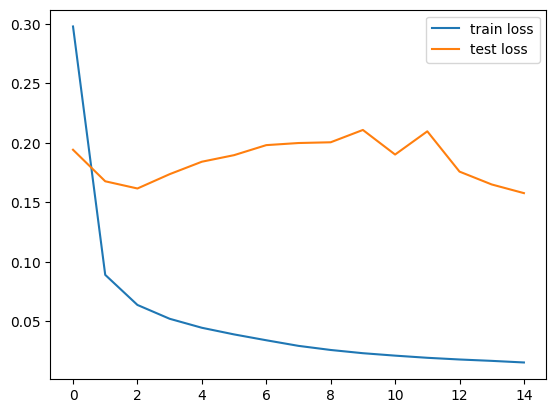

In [76]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

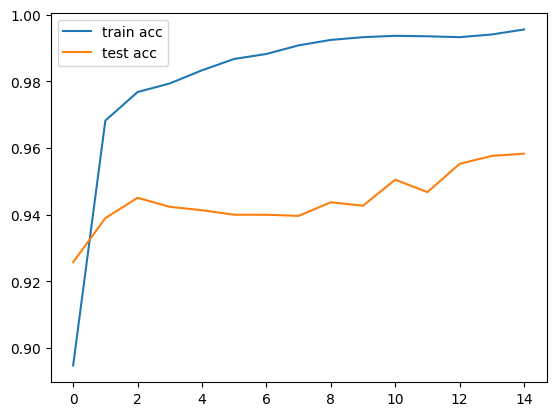

In [77]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [78]:
# load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

In [79]:
# make predictions
Ptest = best_model.predict(Xtest_split + [feat_test])

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [80]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

np.float64(0.9582626399728538)